# Plant Disease Prediction using Convolutional Neural Networks

## Introduction

Plant diseases pose a serious threat to global agriculture and food security. Farmers often struggle to detect diseases at an early stage, leading to reduced crop yield and quality. Traditionally, disease detection relies on manual inspection by experts, which is time-consuming, subjective, and often not feasible for large-scale farming.

In this project, we aim to build a Convolutional Neural Network (CNN) model to predict plant diseases from images of leaves.

## Why Deep Learning for Plant Disease Detection?

- **High Accuracy**: Deep learning models often outperform traditional machine learning models in image-related tasks.

- **Feature Learning**: Unlike classical ML, CNNs automatically extract features (edges, spots, colors) from leaves without manual feature engineering.

- **Generalization**: CNNs can recognize multiple plant diseases across different species if trained on diverse datasets.

## **Seeding for Reproducibility**

In [1]:
import random
import numpy as np
import tensorflow as tf

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

## **Importing required Libraries**

In [35]:
import os
import json
import cv2
from zipfile import ZipFile
from PIL import Image

from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

## **Data Curation**

In [3]:
!pip install kaggle

In [5]:
# Loading Kaggle json file and setting up Kaggle credentials as environment variables

kaggle_credentials = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [6]:
# Downloading Plant Disease dataset

!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.01G/2.04G [00:12<00:00, 134MB/s]
100% 2.04G/2.04G [00:12<00:00, 181MB/s]


In [7]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [8]:
# Unziping the downloaded dataset

with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
   zipObj.extractall()

In [9]:
dataset_path = "plantvillage dataset"

color_dataset_path = "plantvillage dataset/color"

In [10]:
print("Main folders in dataset:")
print(os.listdir(dataset_path))
print("-" * 50)

# Explore each version of the dataset
for version in ["segmented", "color", "grayscale"]:
    version_path = os.path.join(dataset_path, version)

    # Get all class folders inside this version
    class_folders = os.listdir(version_path)

    print(f"{version.upper()} dataset:")
    print(f"  Number of classes: {len(class_folders)}")
    print(f"  Sample class names: {class_folders[:5]}")
    print("-" * 50)

Main folders in dataset:
['color', 'segmented', 'grayscale']
--------------------------------------------------
SEGMENTED dataset:
  Number of classes: 38
  Sample class names: ['Tomato___Early_blight', 'Blueberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___Powdery_mildew']
--------------------------------------------------
COLOR dataset:
  Number of classes: 38
  Sample class names: ['Tomato___Early_blight', 'Blueberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___Powdery_mildew']
--------------------------------------------------
GRAYSCALE dataset:
  Number of classes: 38
  Sample class names: ['Tomato___Early_blight', 'Blueberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___Powdery_mildew']
--------------------------------------------------


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))

In [11]:
# Image Distribution of various classes

# Count images per class in color dataset
class_counts = {cls: len(os.listdir(os.path.join(color_dataset_path, cls)))
                for cls in os.listdir(color_dataset_path)}

# First 10 categories
for cls, count in list(sorted(class_counts.items()))[:10]:
    print(f"\n{cls:25} → {count} images")


Apple___Apple_scab        → 630 images

Apple___Black_rot         → 621 images

Apple___Cedar_apple_rust  → 275 images

Apple___healthy           → 1645 images

Blueberry___healthy       → 1502 images

Cherry_(including_sour)___Powdery_mildew → 1052 images

Cherry_(including_sour)___healthy → 854 images

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot → 513 images

Corn_(maize)___Common_rust_ → 1192 images

Corn_(maize)___Northern_Leaf_Blight → 985 images


## **Data Visualization**

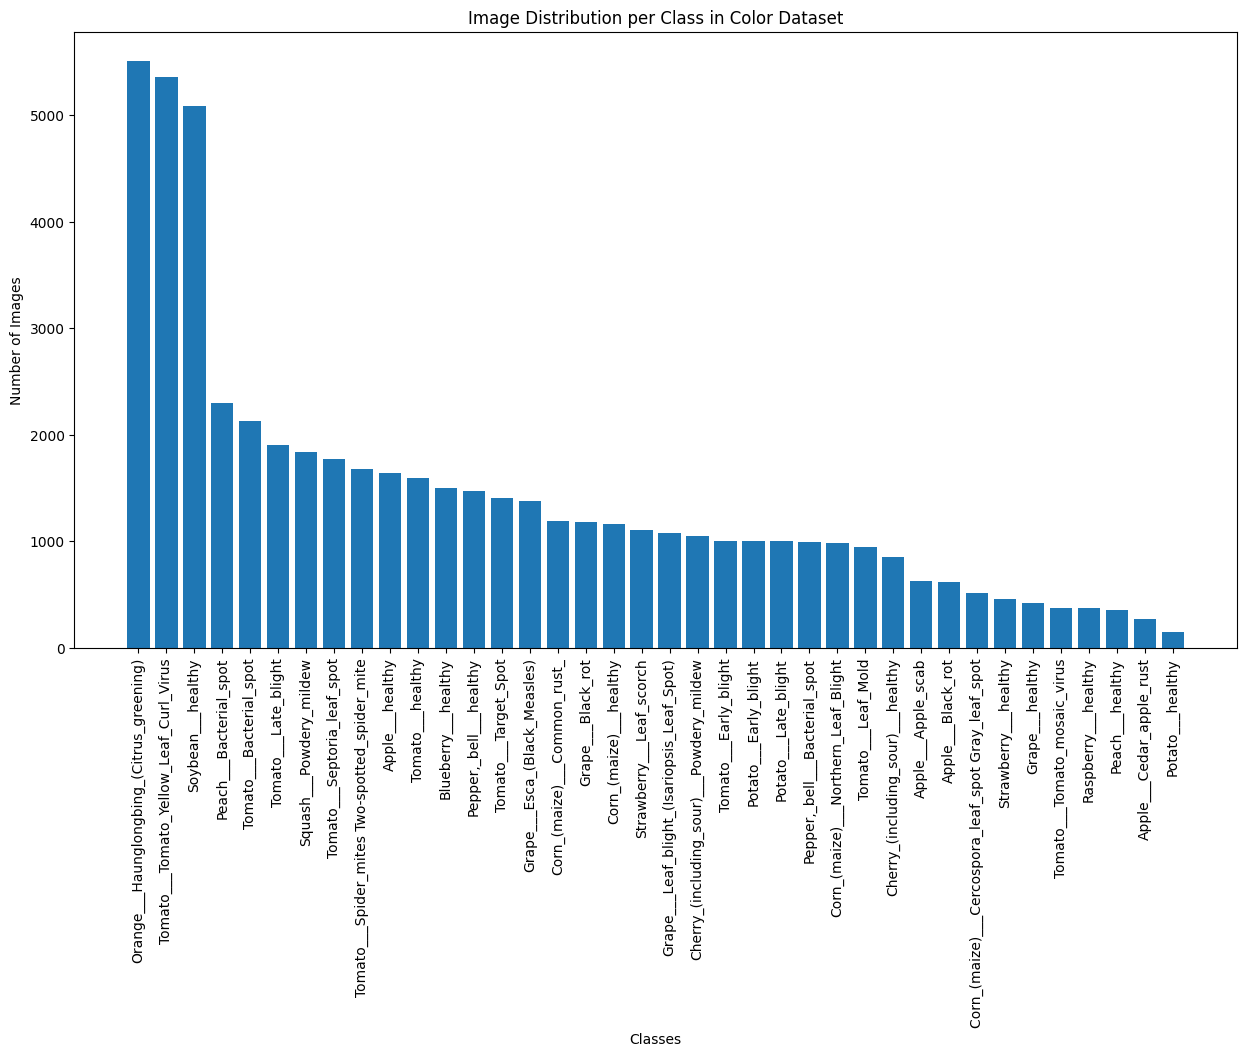

In [12]:
class_counts = {cls: len(os.listdir(os.path.join(color_dataset_path, cls)))
                for cls in os.listdir(color_dataset_path)}

class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse = True))

# Bar chart
plt.figure(figsize = (15, 8))
plt.bar(range(len(class_counts)), list(class_counts.values()))
plt.xticks(range(len(class_counts)), list(class_counts.keys()), rotation = 90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Distribution per Class in Color Dataset")
plt.show()

In [13]:
plt.figure(figsize=(20, 15))

# Pick 6 random classes
sample_classes = random.sample(os.listdir(color_dataset_path), 6)

for idx, cls in enumerate(sample_classes):
    class_path = os.path.join(color_dataset_path, cls)

    # Pick 5 random images from this class
    sample_images = random.sample(os.listdir(class_path), 5)

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(sample_classes), 5, idx*5 + j + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls, fontsize = 10)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Dimensions of the image: (256, 256, 3)



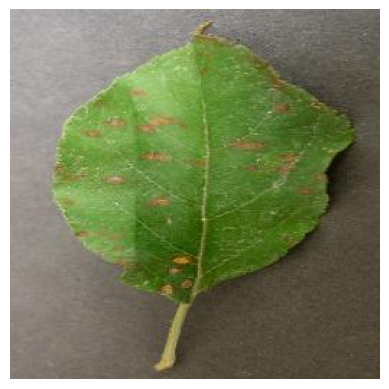

In [14]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

# Display the image
print(f"Dimensions of the image: {img.shape}\n")
plt.imshow(img)
plt.axis('off')
plt.show()

**(256, 256, 3) are the dimensions of the image.**

- Height = 256 pixels

- Width = 256 pixels

- Channels = 3 (RGB color)

In [15]:
img = mpimg.imread(image_path)
print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


- The image is stored as a NumPy array.

- Each pixel is represented as a set of 3 values (R, G, B) = Red, Green, Blue channels.

## **Train-Test Split**

In [16]:
# Image parameters

image_size = 224
batch_size = 32

In [17]:
# Image Data Generator

data_generator = ImageDataGenerator(
    rescale = 1./255, # Normalizes pixel values from [0, 255] → [0, 1].
    validation_split = 0.2 # Use 20% of data for validation
)

In [18]:
# Train Generator

# It'll automatically label the images as well
train_generator = data_generator.flow_from_directory(
    directory = color_dataset_path,
    target_size = (image_size, image_size),    # resizes all images to a fixed size
    batch_size = batch_size,    # number of images loaded per batch during training (increase this if you have more RAM)
    class_mode = 'categorical', # labels are returned as one-hot encoded vectors
    subset = 'training'         # generator should only use the 80% training portion
)

Found 43456 images belonging to 38 classes.


In [19]:
# Validation Generator

validation_generator = data_generator.flow_from_directory(
    directory = color_dataset_path,
    target_size = (image_size, image_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation' # generator should only use the 80% validation portion
)

Found 10849 images belonging to 38 classes.


## **Convolutional Neural Network**

### What is a Convolutional Neural Network (CNN)

A CNN is a type of neural network designed specifically for processing image data. It works by applying a set of convolution filters that slide across the image to capture local features like edges, shapes, and textures.

Key Components of CNN:

1. **Convolutional Layer**: Extracts local features from the image using filters.

2. **Pooling Layer**: Reduces the spatial size (downsampling), making the model computationally efficient.

3. **Activation Function (ReLU)**:  Introduces non-linearity, allowing the network to learn complex relationships.

4. **Fully Connected Layer (Dense)**:  Maps the extracted features to output classes (e.g., healthy, diseased).

5. **Softmax Layer**: Provides probability distribution over different classes.

In [20]:
# Sequential model → layers are stacked one after another in order.
model = models.Sequential()

# Adds a convolutional layer with 32 filters, each of size 3×3, Relu introduces non-linearity to learn complex patterns
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (image_size, image_size, 3)))

# MaxPooling (2×2) downsamples the feature maps by taking the maximum value in each 2×2 block. Keeps only the most important features.
model.add(layers.MaxPooling2D((2, 2)))

# 64 filter deeper layers learn more abstract features (e.g., shapes, textures, disease patterns on leaves).
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

# Another pooling layer → reduces feature map size again.
model.add(layers.MaxPooling2D(2, 2))

# Converts the 2D feature maps (height × width × channels) into a 1D vector.
# It is required before feeding into fully connected (dense) layers.
model.add(layers.Flatten())

# A fully connected layer with 256 neurons that learns high-level combinations of features
model.add(layers.Dense(256, activation = "relu"))

# Final output layer
model.add(layers.Dense(train_generator.num_classes, activation = "softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the Model

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## **Model Training**

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, # Number of steps per epoch
    epochs = 5, # Number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 101s 70ms/step - accuracy: 0.6424 - loss: 1.3788 - val_accuracy: 0.8696 - val_loss: 0.4089
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 101ms/step - accuracy: 0.9206 - loss: 0.2538 - val_accuracy: 0.9005 - val_loss: 0.3233
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9634 - loss: 0.1141 - val_accuracy: 0.8922 - val_loss: 0.3939
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 66ms/step - accuracy: 0.9771 - loss: 0.0718 - val_accuracy: 0.8849 - val_loss: 0.4481
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 64ms/step - accuracy: 0.9837 - loss: 0.0512 - val_accuracy: 0.8777 - val_loss: 0.5915


## **Model Evaluation**

In [25]:
print("Evaluating the model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating the model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8788 - loss: 0.5974
Validation Accuracy: 87.78%


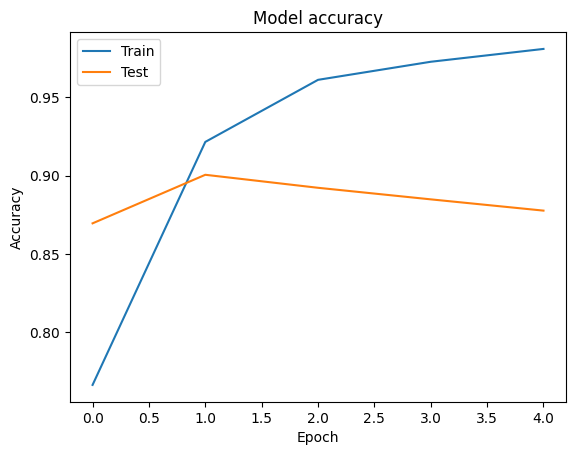

In [27]:
# Plotting training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

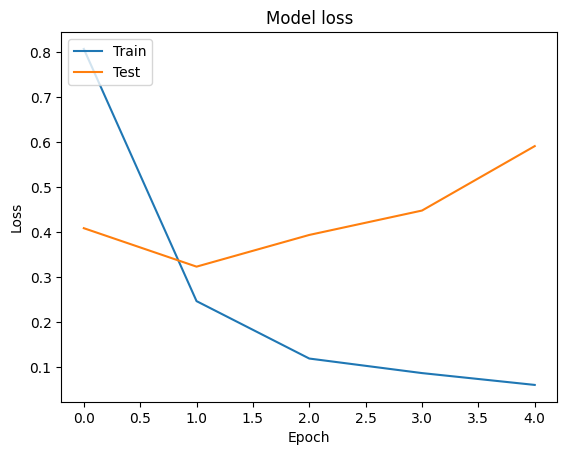

In [28]:
# Plotting training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## **Predictive System**

In [47]:
# Function to Load and Preprocess the Image using Pillow

def load_and_preprocess_image(image_path, target_size = (224, 224)):
    # Load the image
    img = Image.open(image_path)

    # Resize the image
    img = img.resize(target_size)

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis = 0)

    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.

    return img_array

In [32]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    # Preprocess the given imag
    preprocessed_img = load_and_preprocess_image(image_path)

    # Model outputs a probability distribution
    predictions = model.predict(preprocessed_img)

    # Finds the index of the highest probability
    predicted_class_index = np.argmax(predictions, axis = 1)[0]

    # Maps index back to the actual class name
    predicted_class_name = class_indices[predicted_class_index]

    return predicted_class_name

In [33]:
# A map from class indices to class names

class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [34]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [38]:
# Saving the class indices for End to End prediction

json.dump(class_indices, open('drive/MyDrive/Plant Disease Prediction/class_indices.json', 'w'))

In [44]:
image_path = "/content/apple_black_rot.JPG"

Name of the image: apple_black_rot.JPG



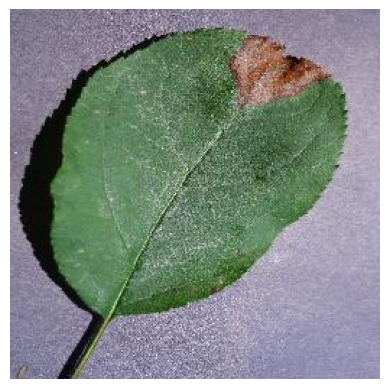

In [49]:
img = mpimg.imread(image_path)

# Display the image
print(f"Name of the image: {image_path.split('/')[-1]}\n")
plt.imshow(img)
plt.axis('off')
plt.show()

In [48]:
predicted_class_name = predict_image_class(model, image_path, class_indices)
print(f"Predicted class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
Predicted class: Apple___Black_rot


In [51]:
# Saving the model for End to End prediction

model.save('drive/MyDrive/Plant Disease Prediction/plant_disease_prediction_model.keras')